In [1]:
import pandas as pd

df = pd.read_csv('../data/schemaBasedSyntacticWeightsResults.csv', sep='|')
df

,Dataset,Attribute Name,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,Average Characters D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,Name,Cosine Similarity,Scarce,2210,Restaurants,11,2,0.67,11,...,0.977528,0.844660,0.50,5,0.739130,0.955056,0.833333,0.60,2,Right
1,Restaurants,Name,Damerau Levenshtein,Scarce,292737,Restaurants,11,2,0.67,11,...,0.786517,0.786517,0.80,36,0.786517,0.786517,0.786517,0.80,9,Right
2,Restaurants,Name,Euclidean Distance,Scarce,286463,Restaurants,11,2,0.67,11,...,0.910112,0.835052,0.65,19,0.729730,0.910112,0.810000,0.60,11,Right
3,Restaurants,Name,Generalized Jaccard,Scarce,2210,Restaurants,11,2,0.67,11,...,0.966292,0.834951,0.25,2,0.730435,0.943820,0.823529,0.40,2,Right
4,Restaurants,Name,Jaro Similarity,Scarce,318143,Restaurants,11,2,0.67,11,...,0.898876,0.820513,0.80,21,0.736364,0.910112,0.814070,0.80,4,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Movies,Title,Overlap Coefficient,Balanced,18961432,Movies,18,3,1.00,24,...,0.395486,0.542184,0.55,1364,0.780069,0.415300,0.542029,0.55,257,Right
203,Movies,Title,q-grams Distance,Balanced,76181835,Movies,18,3,1.00,24,...,0.513056,0.654667,0.25,5129,0.878116,0.514587,0.648906,0.35,777,Right
204,Movies,Title,Simon White,Balanced,155889165,Movies,18,3,1.00,24,...,0.517999,0.659961,0.40,9035,0.896167,0.520579,0.658588,0.50,1535,Right
205,Movies,Title,Longest Common Subsequence,Balanced,373359861,Movies,18,3,1.00,24,...,0.462713,0.601165,0.10,546861,0.760942,0.469186,0.580465,0.40,5135,Right


In [2]:
thresholds = pd.DataFrame()
thresholds['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Threshold')):
            thresholds[column] = df[column]
            
thresholds.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
thresholds.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000
mean,0.755,0.758,0.658,0.660,0.669,0.627,0.605,0.626
std,0.157,0.164,0.212,0.247,0.197,0.233,0.251,0.232
min,0.300,0.200,0.050,0.050,0.200,0.050,0.050,0.050
25%,0.650,0.650,0.500,0.500,0.525,0.450,0.400,0.450
50%,0.800,0.800,0.700,0.700,0.700,0.650,0.650,0.650
75%,0.900,0.900,0.800,0.850,0.800,0.800,0.800,0.800
max,0.950,0.950,0.950,0.950,0.950,0.950,0.950,0.950


In [4]:
corr = thresholds.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,1.00,0.95,0.86,0.73,0.90,0.84,0.84,0.82
RSR,0.95,1.00,0.88,0.77,0.90,0.84,0.84,0.85
RCA,0.86,0.88,1.00,0.87,0.96,0.91,0.94,0.94
BAH,0.73,0.77,0.87,1.00,0.83,0.84,0.82,0.83
BMC,0.90,0.90,0.96,0.83,1.00,0.92,0.94,0.95
EXC,0.84,0.84,0.91,0.84,0.92,1.00,0.90,0.91
KRC,0.84,0.84,0.94,0.82,0.94,0.90,1.00,0.95
UMC,0.82,0.85,0.94,0.83,0.95,0.91,0.95,1.00


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

Text(0.5, 1.0, 'Schema-Based Syntactic Weights')

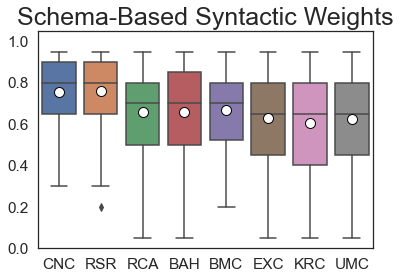

In [6]:
ax = sns.boxplot(data = thresholds,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
ax.set(ylim=(0.0, 1.05))
ax.set_title("Schema-Based Syntactic Weights", fontsize = 25)
# plt.savefig('sbsyThr.eps', format='eps')

In [7]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

Text(0.5, 1.0, 'Schema-Based Syntactic Weights')

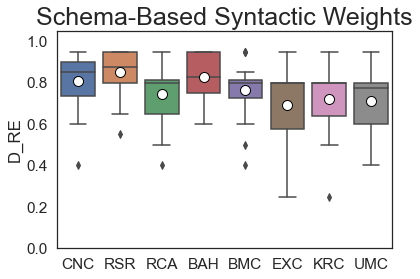

In [8]:
dataset_df = thresholds[thresholds['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_RE')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
# plt.savefig('sbsyD1.eps', format='eps')

[(0.0, 1.0)]

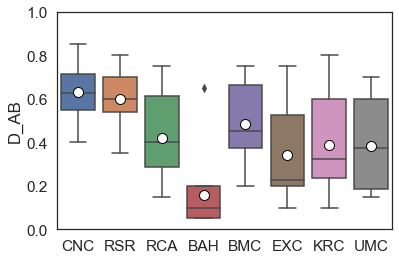

In [9]:
dataset_df = thresholds[thresholds['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AB')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD2.eps', format='eps')

[(0.0, 1.0)]

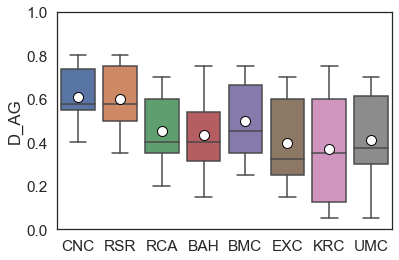

In [10]:
dataset_df = thresholds[thresholds['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AG')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD3.eps', format='eps')

[(0.0, 1.0)]

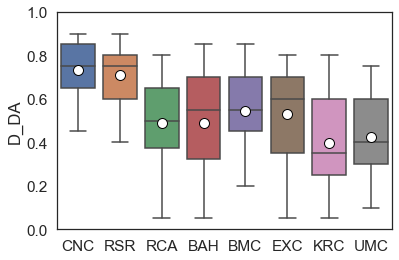

In [11]:
dataset_df = thresholds[thresholds['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD4.eps', format='eps')

[(0.0, 1.0)]

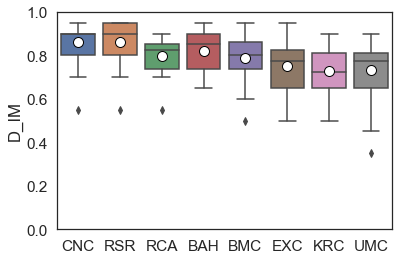

In [12]:
dataset_df = thresholds[thresholds['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IM')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD5.eps', format='eps')

Text(0.5, 1.0, 'Schema-Based Syntactic Weights')

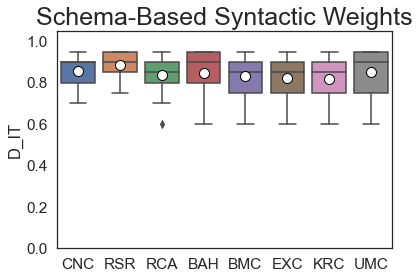

In [13]:
dataset_df = thresholds[thresholds['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IT')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
# plt.savefig('sbsyD6.eps', format='eps')

[(0.0, 1.0)]

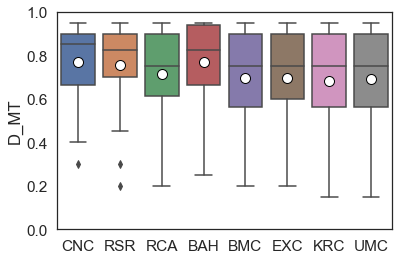

In [14]:
dataset_df = thresholds[thresholds['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_MT')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD7.eps', format='eps')

[(0.0, 1.0)]

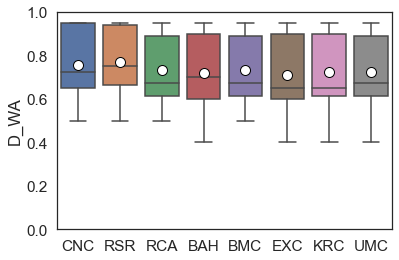

In [15]:
dataset_df = thresholds[thresholds['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_WA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD8.eps', format='eps')

[(0.0, 1.0)]

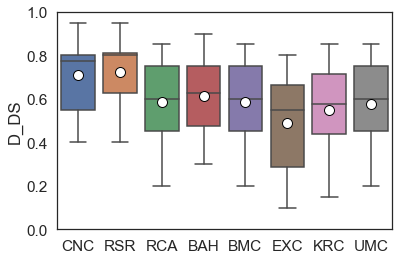

In [16]:
dataset_df = thresholds[thresholds['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DS')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD9.eps', format='eps')

[(0.0, 1.0)]

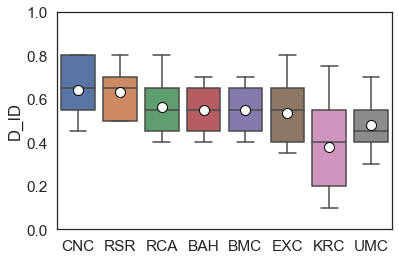

In [17]:
dataset_df = thresholds[thresholds['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_ID')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sbsyD10.eps', format='eps')